<h1><center> Article B</center></h1>
<h1><center>Sequential Feature Selection in Customer Churn Prediction Based on Naive Bayes</center></h1>



## Sommaire
### 1-La compréhension du problème métier : voir le rapport
### 2-La compréhension des données
    1-chargement des données
    2.Exploration des données : EDA
    3.Visualisation
### 3-La préparation des données
    1.Equilibrage de la variable cible
    2.Feature Extraction : Réduction de dimension
    3.Réduction de modalités et Encodage
    4.Extraction de la variable cible : division des données Xi et y
    5.Standardisation : Min max scaler
    6.Feature Selection :
        SFS : Sequential Forward Selection
        SBS : Sequential Backward Selection
        SFFS : Sequential Forward Floating Selection
        SBFS : Sequential Backward Floating Selection
    7.Division des données trainset(70%) et testset(30%)
### 4-La modélisation
    1.Integration de Naïve Bayes : SFS
    2.Integration de Naïve Bayes : SBS
    3.Integration de Naïve Bayes : SFFS
    4.Integration de Naïve Bayes : SBFS
    5.Integration de Naïve Bayes sans optimisation
### 5- Evaluation et Comparaison

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib import pyplot

## 2-La compréhension des données

In [ ]:
#1-chargement des données
data = pd.read_excel('Telco_customer_churn.csv.xlsx')
data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


### Exploration des données

In [ ]:
#2.Exploration des données : EDA
#afficher les dimensions du dataset + les types de chaque colonnes
print(data.shape)
print(data.columns)
print(data.dtypes)
#afficher les valeurs manquantes pour chaque colonne
print('valeurs manquantes = \n',data.isnull().sum())
#categorical cols / afficher les variables qualitatives
categorical_cols = data.columns[data.dtypes==object].tolist()
print('categorical cols = \n',categorical_cols)
print('categorical cols = \n',len(categorical_cols))
print('categorical cols(modalities) = \n',data[categorical_cols].nunique())
#numerical cols / afficher les variables quantitatives
numerical_cols = data.columns[data.dtypes!=object].tolist()
print('numerical cols = \n',numerical_cols)
print('numerical cols = \n',len(numerical_cols))
#description des variables quantitatives : qunatile 1, mediane=2 , 3 + moyenne + min + max
print(data.describe())

(7043, 33)
Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')
CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service 

### Visualisation Graphique

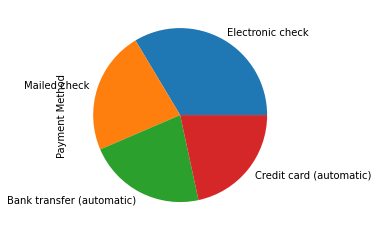

In [ ]:
#3.Visualisation
#pourcentage des modalités de la variable "Payment Method"
data["Payment Method"].value_counts().plot.pie()

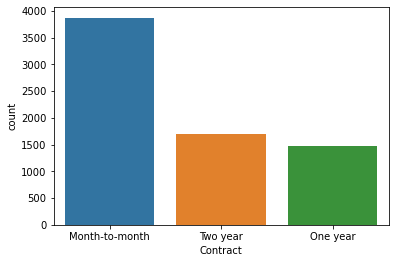

In [ ]:
#3.Visualisation
#modalité de la variable "Contract"
sns.countplot(data["Contract"],label="Count")

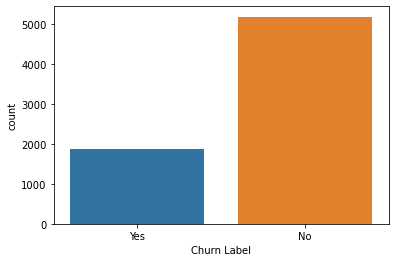

In [ ]:
#3.Visualisation
#cible : modalité de la cible "Churn Label"
sns.countplot(data["Churn Label"],label="Count")

#### >On remarque un désequilibre entre les modalités de notre cible (no >>> yes)

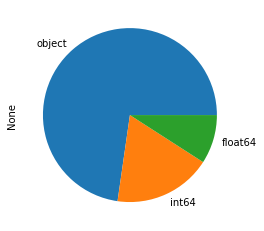

In [ ]:
#3.Visualisation
#statistique sur le nb de chaque type des colonnes
data.dtypes.value_counts().plot.pie()

<ipython-input-8-399aba836b66>:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


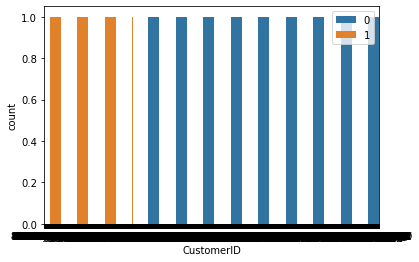

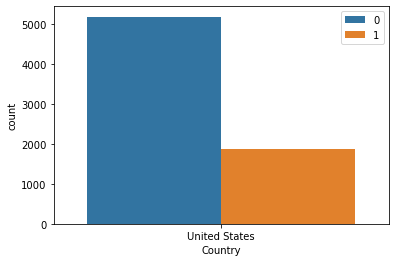

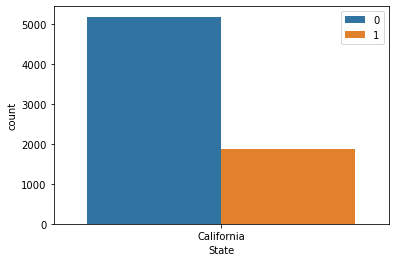

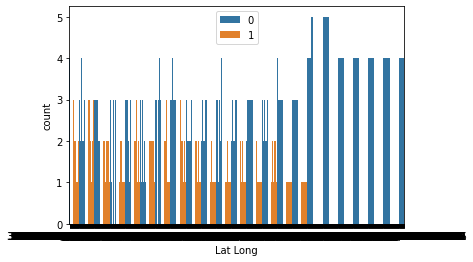

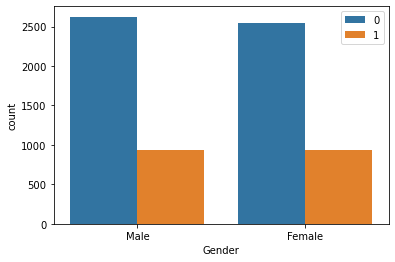

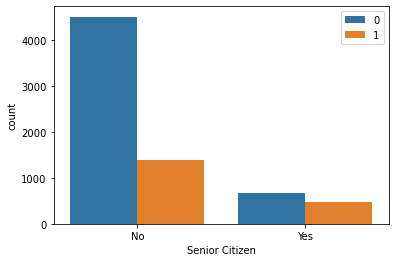

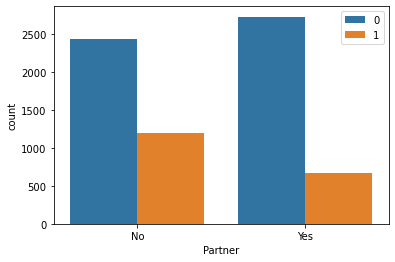

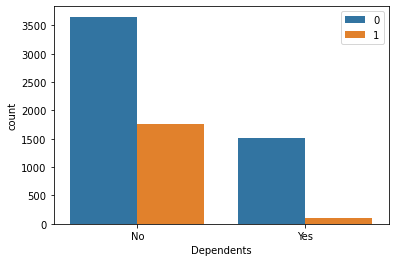

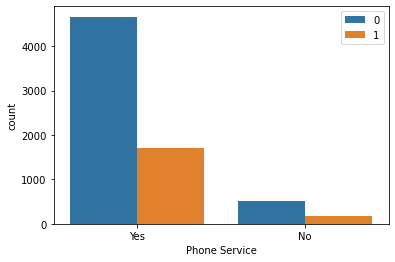

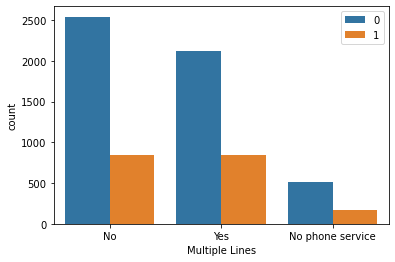

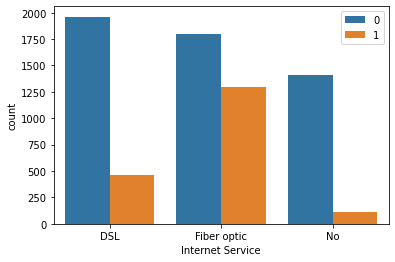

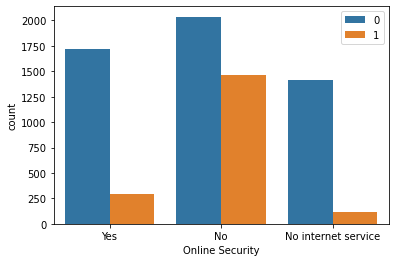

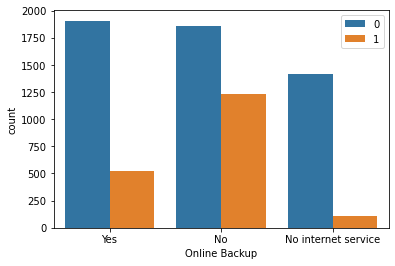

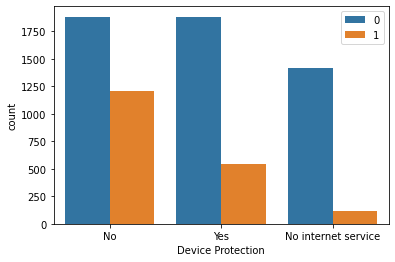

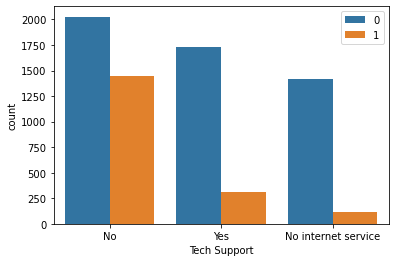

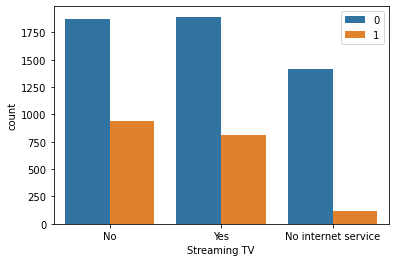

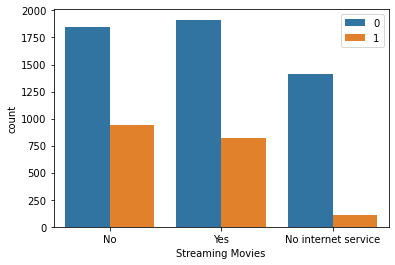

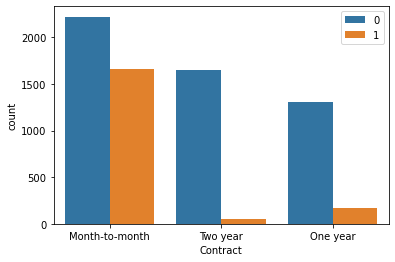

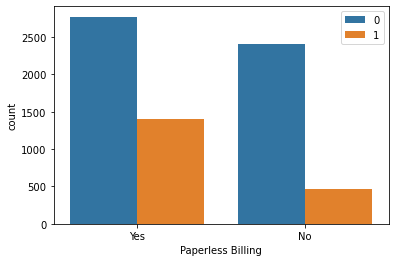

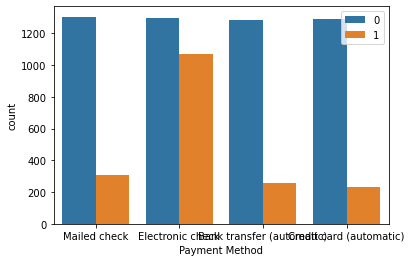

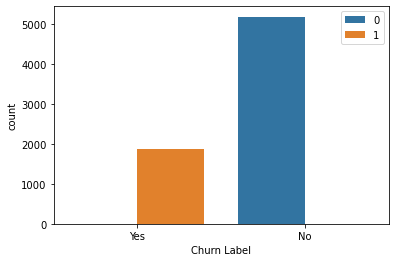

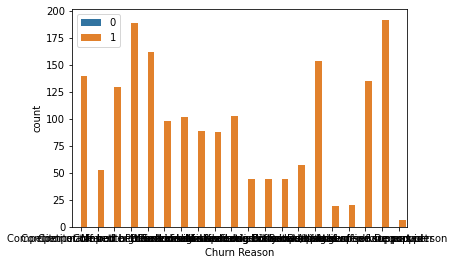

In [ ]:
#3.Visualisation
quite=data[data['Churn Value']==1]

reste=data[data['Churn Value']==0]

for col in (data.columns[data.dtypes==object].drop(['City','Total Charges'])): #.drop('Churn Value')):
    #plt.figure()
    #sns.distplot(quite[col],label='quite')
    #sns.distplot(reste[col],label='reste')
    #plt.legend()
    plt.figure()
    sns.countplot(x=col,hue='Churn Value',data=data)
    plt.legend()




Les clients sans personnes à leurs charge (enfants, seniors...) ont quatre fois plus de chances de rompre avec les services de la companie.<br>
Les seniors ont trois fois plus de chances de de rompre avec les services de la companie.<br>
Les client sans partenaires on deux fois plus de chances de quitter les services de la companie.<br>
La majorité des clients ayant résilié leurs abonnements ont utilisent un service téléphonique.<br>
Les clients ayant la fibre optique en tant que service sont plus prompts à "churner".<br>
Les clients qui n'ont pas les services suivants sont plus prompts à quitter les services de la companie :
Online Security, Device Protection, Online Backup, et Tech Support.

C:\Users\iskan\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\iskan\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


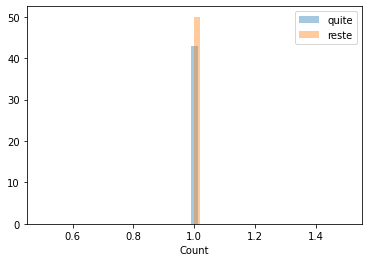

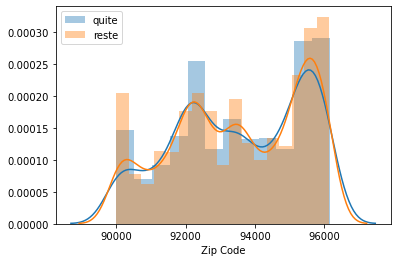

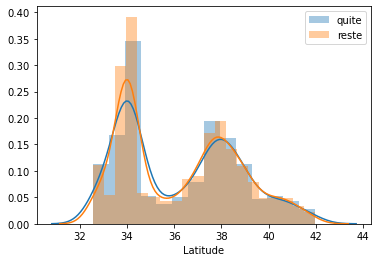

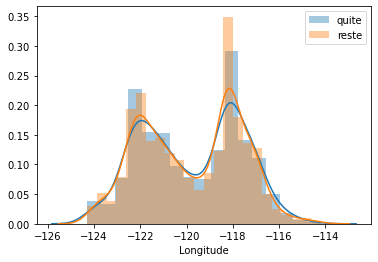

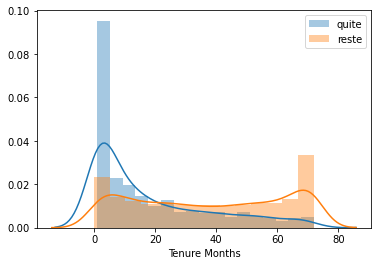

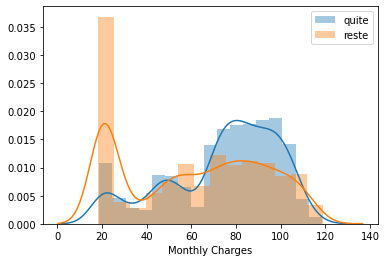

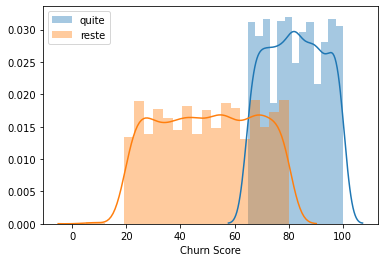

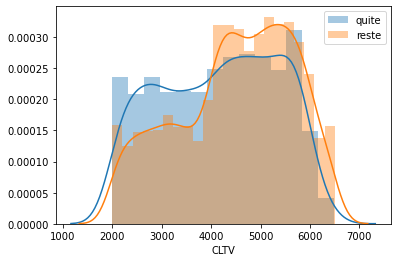

In [ ]:
for col in (data.columns[data.dtypes!=object].drop('Churn Value')): #.drop('Churn Value')):
    plt.figure()
    sns.distplot(quite[col],label='quite')
    sns.distplot(reste[col],label='reste')
    plt.legend()

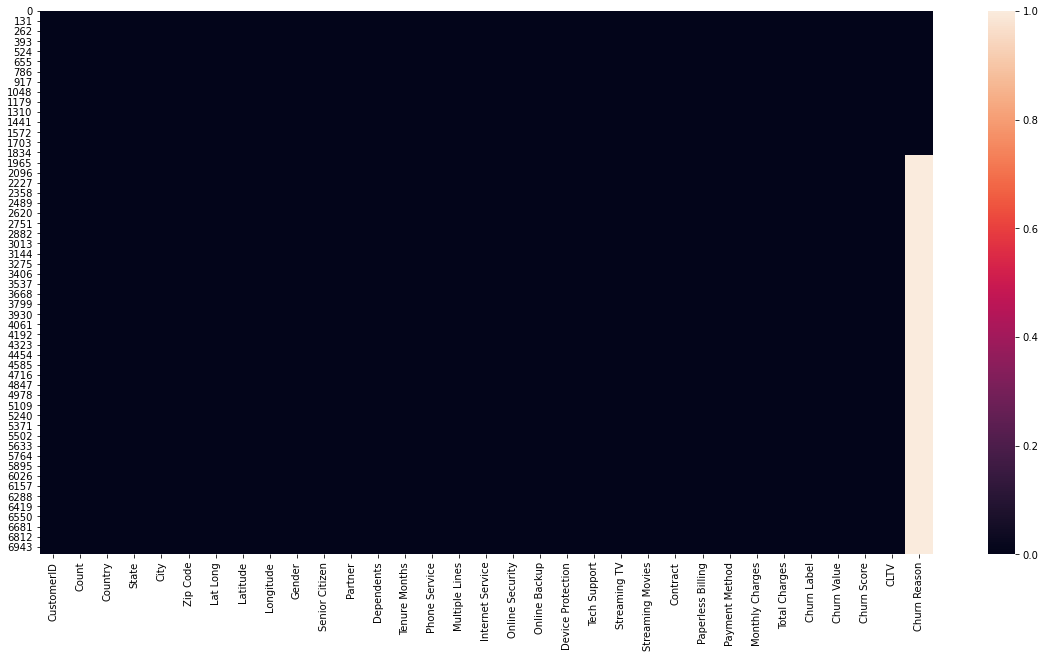

In [ ]:
#3.Visualisation
#statistique sur les valeurs manquantes pour chaque variable (bleu: pas de valeur manquante/blanc : existe une valeur manquante)
plt.figure(figsize=(20,10))
sns.heatmap(data.isnull())

C:\Users\iskan\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\iskan\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\iskan\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\iskan\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


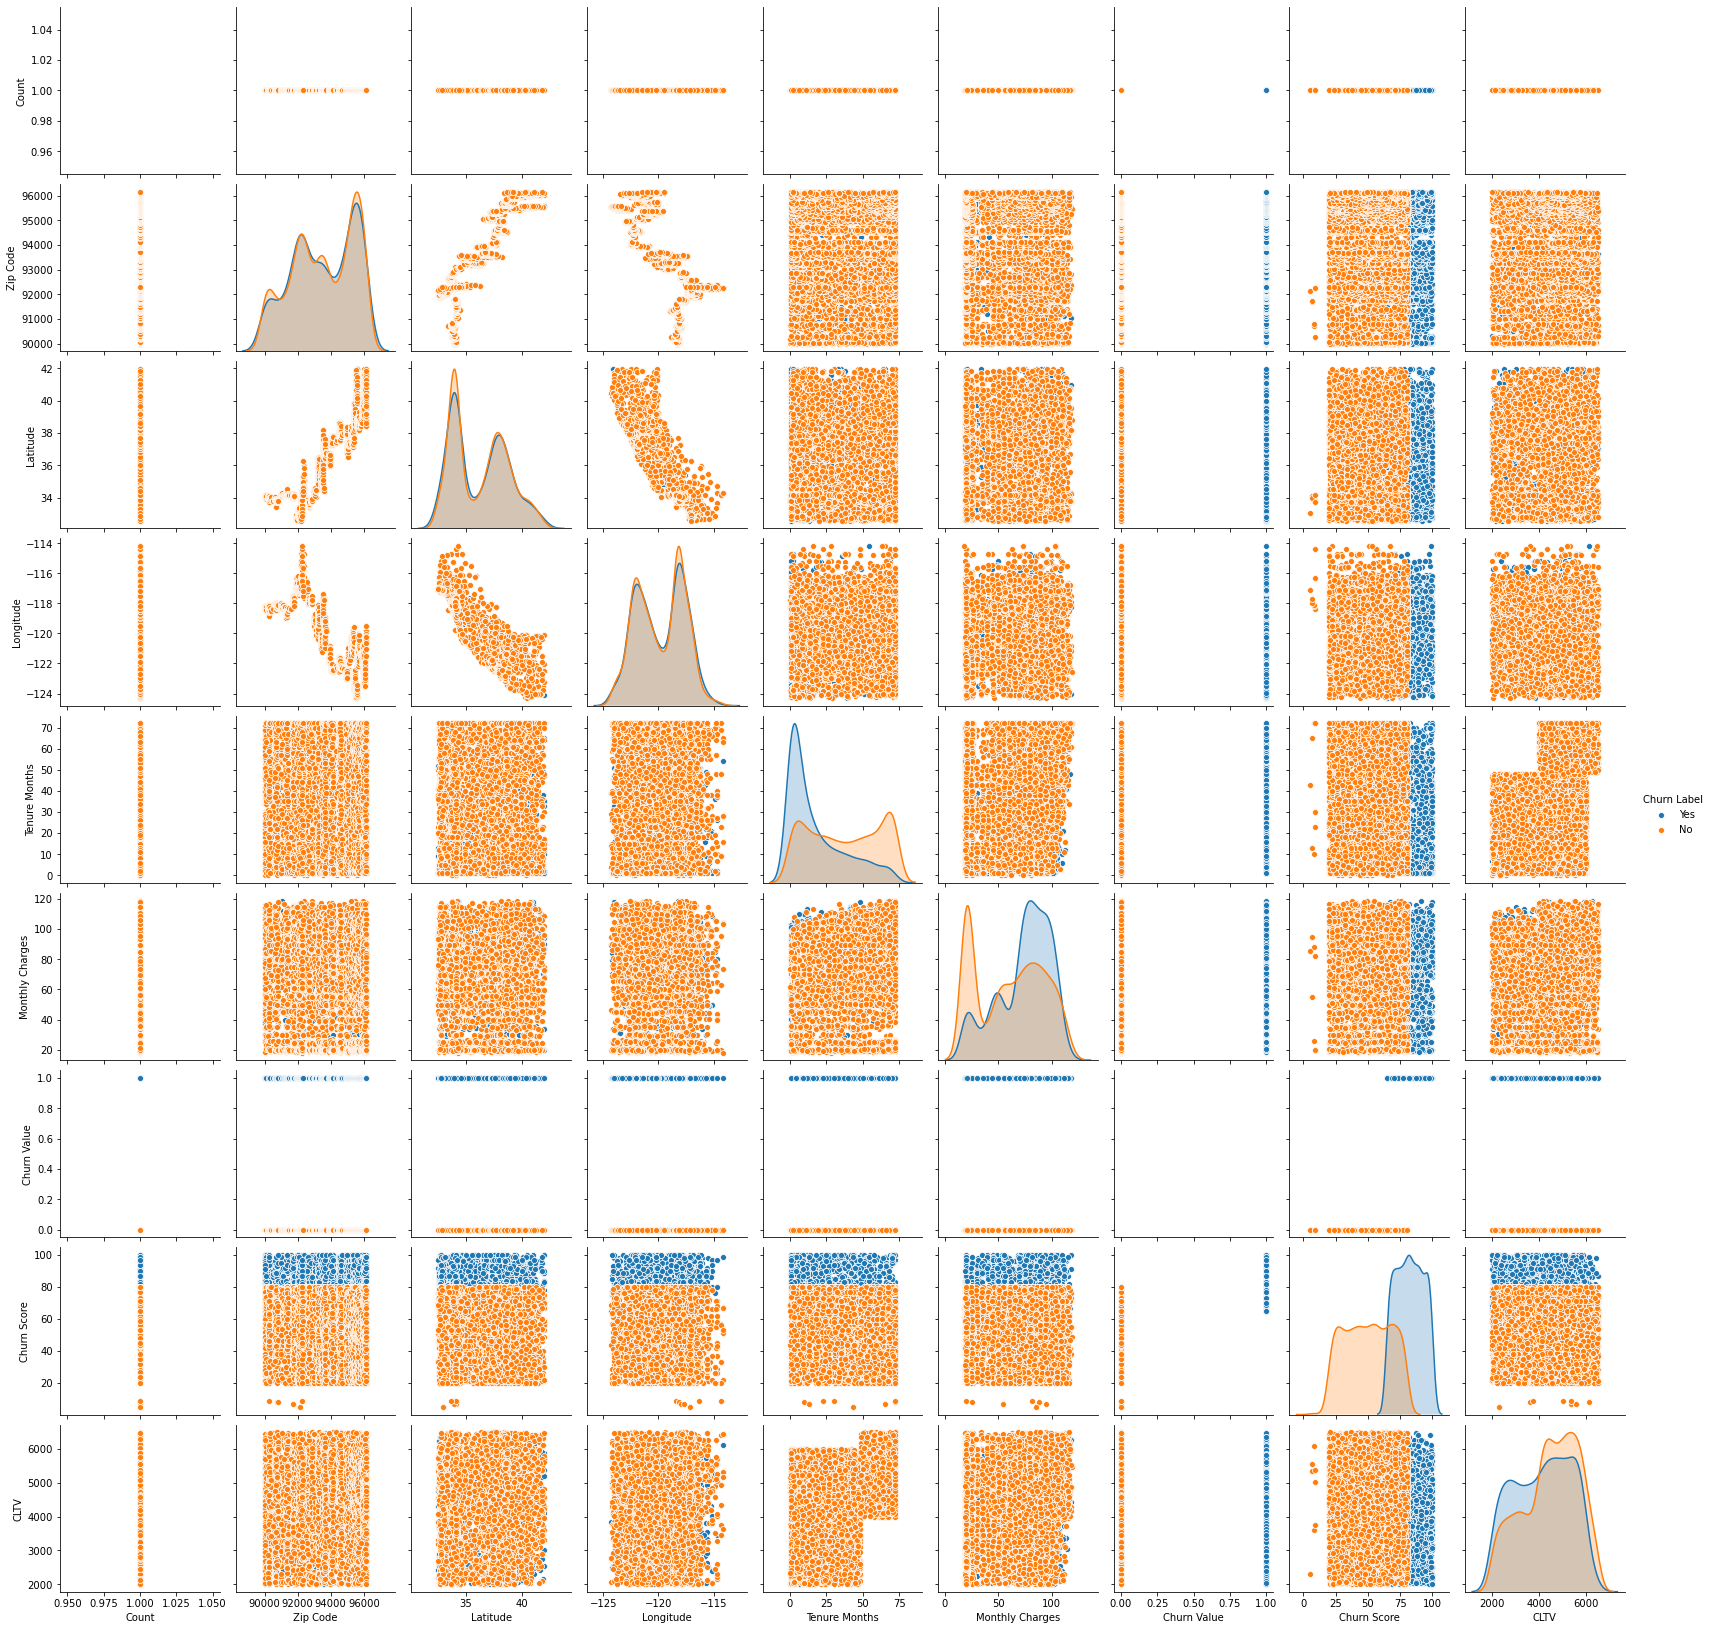

In [ ]:
#3.Visualisation
#tracage de la matrice col_j = f(col_i) afin de deceler les éventuelles de dépendances entre les colonnes numériques 2 par 2.
sns.pairplot(data, hue='Churn Label', height=2.5);
#Churn Value et Count sont 2 variables sans variance (toutes les observations sont ègales à 1). Ceci va entraîner 4 Warnings (2 warning par variables : 1 pour l'axe des X et un pour les Y) qu'on peut ignorer.

#### Il s'agit trivialement d'une matrice symetrique, il suffit donc simplement d'étudier la partie triangulaire inférieure.
#### On constate que les variables longiture, latitude et zip code sont corrélés

## 3-La préparation des données

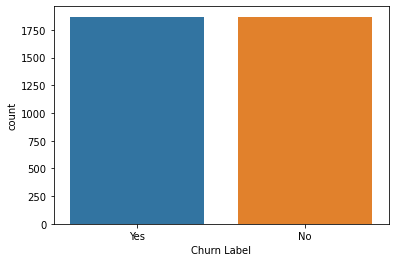

In [ ]:
#1.Equilibrage d'échantillon
data = pd.read_excel('Telco_customer_churn.csv.xlsx')
data.shape
(data["Churn Label"]=='Yes').sum()#1869
(data["Churn Label"]=='No').sum()#5174
data_yes = data[data["Churn Label"]=='Yes']
data_no = data[data["Churn Label"]=='No'].sample(n = (data["Churn Label"]=='Yes').sum(),random_state=0)
data = pd.concat([data_yes, data_no])
data.shape

sns.countplot(data["Churn Label"],label="Count")

In [ ]:
#2.Feature Extraction : Réduction de dimension
data = data.drop(['Churn Reason'], axis=1) #Plus de 73% de valeurs manquantes
data = data.drop(['CustomerID'], axis=1)   #Variable non significative
data = data.drop(['Country'], axis=1)      #Ne présente qu'une une seule modalité
data = data.drop(['State'], axis=1)        #Ne présente qu'une une une seule modalité
data = data.drop(['Churn Label'], axis=1)  #Redondance avec la colonne churn value qui encode churn label
data = data.drop(['Latitude'], axis=1)     #Redondance avec la colonne City
data = data.drop(['Longitude'], axis=1)    #Redondance avec la colonne City
data = data.drop(['Lat Long'], axis=1)     #Redondance avec la colonne City
data = data.drop(['Count'], axis=1)        #Ne présente qu'une une seule modalite
data = data.drop(['City'], axis=1)         #Ne présente qu'une une seule modalite

In [ ]:
#3.Réduction de modalités et Encodage
#3.1.Réduction de modalités
#Verifier les modalités de chaque colonne qualitative
categoriical_cols = data.columns[data.dtypes==object].tolist()
print('categorical cols(modalities) = \n',data[categoriical_cols].nunique())

#Affichage des variables qualitatives ayant 3 modalités
for col in data.columns:
    if data[col].nunique() == 3:
        print(col,' ',data[col].unique())

#Reduction du nombre de modalités (3->2)
data["Streaming Movies"].replace({"No internet service": "No"}, inplace=True)
data["Multiple Lines"].replace({"No phone service": "No"}, inplace=True)
data["Online Security"].replace({"No internet service": "No"}, inplace=True)

#Conversion de la variable "Total Charges" qualitive -> qunatitative (float)
data['Total Charges'] = pd.to_numeric(data['Total Charges'], errors='coerce') #cast String to float
data.dropna(axis=0,inplace=True);

categorical cols(modalities) = 
 Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Total Charges        3485
dtype: int64
Multiple Lines   ['No' 'Yes' 'No phone service']
Internet Service   ['DSL' 'Fiber optic' 'No']
Online Security   ['Yes' 'No' 'No internet service']
Online Backup   ['Yes' 'No' 'No internet service']
Device Protection   ['No' 'Yes' 'No internet service']
Tech Support   ['No' 'Yes' 'No internet service']
Streaming TV   ['No' 'Yes' 'No internet service']
Streaming Movies   ['No' 'Yes' 'No internet service']
Contract   ['Month-to-month' 'Two year' 'One year']


In [ ]:
#3.Réduction de modalités et Encodage
#3.2.Encodage

#Encodage des variables qualitatives à 2 modalités
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le_count = 0
for col in data.columns[1:]:
    if data[col].dtype == 'object':
        if len(list(data[col].unique())) <= 2:
            le.fit(data[col])
            data[col] = le.transform(data[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))
print(data.shape)
data.head()

9 columns were label encoded.
(3734, 23)


,Zip Code,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
0,90003,1,0,0,0,2,1,0,DSL,1,...,No,0,Month-to-month,1,Mailed check,53.85,108.15,1,86,3239
1,90005,0,0,0,1,2,1,0,Fiber optic,0,...,No,0,Month-to-month,1,Electronic check,70.70,151.65,1,67,2701
2,90006,0,0,0,1,8,1,1,Fiber optic,0,...,Yes,1,Month-to-month,1,Electronic check,99.65,820.50,1,86,5372
3,90010,0,0,1,1,28,1,1,Fiber optic,0,...,Yes,1,Month-to-month,1,Electronic check,104.80,3046.05,1,84,5003
4,90015,1,0,0,1,49,1,1,Fiber optic,0,...,Yes,1,Month-to-month,1,Bank transfer (automatic),103.70,5036.30,1,89,5340


### Extraction de la variable cible / labélisée

In [ ]:
#4.Extraction de la variable cible : division des données X et y
X = data.drop(['Churn Value'],axis=1)
y = data['Churn Value']
#encodage
X = pd.get_dummies(X, prefix_sep='_', drop_first=True)

## Standardisation

In [ ]:
#5.Standardisation : Min max scaler
#X_new = (X_i - X_min) / (X_max - X_min)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)

X = scaler.transform(X)
X

array([[3.24675325e-04, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [6.49350649e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [8.11688312e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [9.96753247e-01, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.70941558e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [4.14285714e-01, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

## Feature Selection

In [ ]:
#6.Feature Selection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
#pip install mlxtend : anaconda
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

### SFS : Sequential Forward Selection
    Une approche heuristique de recherche est utilisée dans cette méthode, en commençant par un ensemble vide de caractéristiques.A chaque itération, la meilleure caractéristique parmi celles qui restent sera sélectionnée, supprimée de l’ensemble de départ et ajoutée au sous-ensemble des caractéristiques sélectionnées. Le processus de sélection continue jusqu’à un critère d’arrêt.
#### 0-Le tableau des variables selectionnées (Ts) est initialement vide
#### 1-Ajouter la variable la plus significatif au tableau Ts k fois (k : nb de variables à choisir)
#### 2-Renvoie un sous-ensemble Xk; le nombre de fonctionnalités sélectionnées k, où k < d, doit être précisé a priori .

In [ ]:
#6.Feature Selection
# SFS : Sequential Forward Selection

sfs_x_selected = []
#sfs_x_selected :est une liste qui contiendra les index des colonnes sélectionnées en sfs pour k=nombre de colonne

for i in range(1,X.shape[1]+1):
    sfs = SFS(gnb,
              k_features=i,
              forward=True,
              floating=False,
              scoring='accuracy',
              cv=10,
              n_jobs=-1)

    sfs = sfs.fit(X, y)

   #print('\npour(k=',i,') en SFS les numero de colonnes selectionnées:',sfs.k_feature_idx_)
   #print('CV Score:',sfs.k_score_)


    sfs_x_selected.append(sfs.k_feature_idx_)



In [ ]:
#6.Feature Selection
# SFS : Sequential Forward Selection

#les colonnes selectionnes par sfs pour les differents k
sfs_x_selected
#par exemple sfs_x_selected[3]=(5,10,13,15) ,cela veut dire pour k=4 les index des colonnes choisies par SFS sont (5,10,13,15)

[(13,),
 (5, 13),
 (5, 11, 13),
 (5, 7, 11, 13),
 (1, 5, 7, 11, 13),
 (1, 5, 7, 11, 13, 20),
 (1, 5, 6, 7, 11, 13, 20),
 (1, 5, 6, 7, 9, 11, 13, 20),
 (1, 5, 6, 7, 9, 11, 13, 18, 20),
 (1, 5, 6, 7, 9, 11, 13, 18, 20, 29),
 (1, 2, 5, 6, 7, 9, 11, 13, 18, 20, 29),
 (1, 2, 3, 5, 6, 7, 9, 11, 13, 18, 20, 29),
 (1, 2, 3, 5, 6, 7, 9, 11, 13, 18, 20, 24, 29),
 (1, 2, 3, 5, 6, 7, 9, 11, 13, 14, 18, 20, 24, 29),
 (0, 1, 2, 3, 5, 6, 7, 9, 11, 13, 14, 18, 20, 24, 29),
 (0, 1, 2, 3, 5, 6, 7, 9, 11, 13, 14, 15, 18, 20, 24, 29),
 (0, 1, 2, 3, 5, 6, 7, 9, 11, 13, 14, 15, 18, 20, 24, 26, 29),
 (0, 1, 2, 3, 5, 6, 7, 9, 11, 13, 14, 15, 18, 20, 22, 24, 26, 29),
 (0, 1, 2, 3, 5, 6, 7, 9, 10, 11, 13, 14, 15, 18, 20, 22, 24, 26, 29),
 (0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 18, 20, 22, 24, 26, 29),
 (0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 18, 20, 22, 24, 26, 27, 29),
 (0,
  1,
  2,
  3,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  13,
  14,
  15,
  18,
  20,
  22,
  24,
  26,
  27,
  28,
  29),
 (

### SBS : Sequential Backward Selection
    A la différence de la méthode SFS, cette méthode commence par l’ensemble de toutes les caractéristiques et à chaque itération, la caractéristique la plus mauvaise sera supprimée
#### 0-Le tableau des variables selectionnées (Ts) est initialement contient tt les Xi
#### 1-Supprimer la variable la moins significatif du tableau Ts n-k fois (k : nb de variables à choisir, n : nb de varibles)
#### 2-Renvoie un sous-ensemble Xk; le nombre de fonctionnalités sélectionnées k, où k < d, doit être précisé a priori .
    rq : SBS est plus performante parce qu’elle prend en considération l’interaction d’une caractéristique avec un ensemble de caractéristiques plus large, contrairement au SFS qui ne prend en considération que l’interaction de cette caractéristique avec le sous-ensemble déjà sélectionné.

In [ ]:
#6.Feature Selection
# SBS : Sequential Backward Selection

sbs_x_selected = []
#sbs_x_selected :est une liste qui contiendra les index des colonnes sélectionnées en sbs pour k=nombre de colonne

for i in range(1,X.shape[1]+1):
    sbs = SFS(gnb,
              k_features=i,
              forward=False,
              floating=False,
              scoring='accuracy',
              cv=4,
              n_jobs=-1)
    sbs = sbs.fit(X, y)

   #print('\npour(k=',i,')en SBS les numero de colonnes selectionnées:',sbs.k_feature_idx_)
   #print('CV Score:',sbs.k_score_)

    sbs_x_selected.append(sbs.k_feature_idx_)

In [ ]:
#6.Feature Selection
# SBS : Sequential Backward Selection

#les colonnes selectionnes par sbs pour les differents k
sbs_x_selected
#par exemple sbs_x_selected[3]=(5,10,11,13) ,cela veut dire pour k=4 les index des colonnes choisies par SFS sont (5,10,11,13)

[(13,),
 (13, 26),
 (13, 25, 26),
 (11, 13, 25, 26),
 (10, 11, 13, 25, 26),
 (3, 10, 11, 13, 25, 26),
 (3, 8, 10, 11, 13, 25, 26),
 (3, 8, 10, 11, 13, 16, 25, 26),
 (3, 8, 10, 11, 13, 16, 17, 25, 26),
 (3, 5, 8, 10, 11, 13, 16, 17, 25, 26),
 (3, 4, 5, 8, 10, 11, 13, 16, 17, 25, 26),
 (3, 4, 5, 8, 10, 11, 13, 16, 17, 19, 25, 26),
 (3, 4, 5, 8, 10, 11, 13, 16, 17, 19, 25, 26, 29),
 (3, 4, 5, 8, 10, 11, 13, 16, 17, 19, 24, 25, 26, 29),
 (3, 4, 5, 8, 10, 11, 13, 16, 17, 19, 20, 24, 25, 26, 29),
 (3, 4, 5, 6, 8, 10, 11, 13, 16, 17, 19, 20, 24, 25, 26, 29),
 (3, 4, 5, 6, 8, 9, 10, 11, 13, 16, 17, 19, 20, 24, 25, 26, 29),
 (1, 3, 4, 5, 6, 8, 9, 10, 11, 13, 16, 17, 19, 20, 24, 25, 26, 29),
 (0, 1, 3, 4, 5, 6, 8, 9, 10, 11, 13, 16, 17, 19, 20, 24, 25, 26, 29),
 (0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 16, 17, 19, 20, 24, 25, 26, 29),
 (0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 16, 17, 19, 20, 22, 24, 25, 26, 29),
 (0,
  1,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  13,
  16,
  17,
  18,
  19,

### SFFS : Sequential Forward Floating Selection
    Exécuter l'algorithme SFS l fois.

In [ ]:
#6.Feature Selection
# SBS : Sequential Backward Selection

sffs_x_selected = []
#sffs_x_selected :est une liste qui contiendra les index des colonnes sélectionnées en sffs pour k=nombre de colonne
for i in range(1,X.shape[1]+1):
    sffs = SFS(gnb,
               k_features=i,
               forward=True,
               floating=True,
               scoring='accuracy',
               cv=4,
               n_jobs=-1)
    sffs = sffs.fit(X, y)

    #print('\npour(k=',i,') en SFFS les numero de colonnes selectionnées:',sffs.k_feature_idx_)
    #print('CV Score:',sffs.k_score_)

    sffs_x_selected.append(sffs.k_feature_idx_)

In [ ]:
#6.Feature Selection
# SBS : Sequential Backward Selection

#les colonnes selectionnes par sffs pour les differents k
sffs_x_selected
#par exemple sffs_x_selected[3]=(5,10,13,15) ,cela veut dire pour k=4 les index des colonnes choisies par SFFS sont (5,10,13,15)

[(13,),
 (5, 13),
 (5, 11, 13),
 (5, 7, 11, 13),
 (0, 5, 7, 11, 13),
 (0, 1, 5, 7, 11, 13),
 (0, 1, 5, 11, 13, 24, 29),
 (0, 1, 5, 11, 13, 20, 24, 29),
 (0, 1, 5, 7, 11, 13, 20, 24, 29),
 (0, 1, 5, 7, 9, 11, 13, 20, 24, 29),
 (0, 1, 3, 5, 7, 9, 11, 13, 20, 24, 29),
 (0, 1, 3, 5, 7, 9, 11, 13, 14, 20, 24, 29),
 (0, 1, 3, 5, 6, 7, 9, 11, 13, 14, 20, 24, 29),
 (0, 1, 3, 5, 6, 7, 9, 10, 11, 13, 14, 20, 24, 29),
 (0, 1, 2, 3, 5, 6, 7, 9, 10, 11, 13, 14, 18, 20, 24),
 (0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 13, 14, 18, 20, 24),
 (0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 13, 14, 18, 20, 24, 29),
 (0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 13, 14, 18, 20, 24, 27, 29),
 (0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 13, 14, 18, 20, 22, 24, 27, 29),
 (0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 18, 20, 22, 24, 27, 29),
 (0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 20, 22, 24, 27, 29),
 (0,
  1,
  2,
  3,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  18,
  20,
  22,
  24,
  26,
  27,
  28,
  29),
 

### SBFS : Sequential Backward Floating Selection
    Exécuter l'algorithme SBS r fois.

In [ ]:
#6.Feature Selection
# SBFS : Sequential Backward Floating Selection
sbfs_x_selected = []
#sbfs_x_selected :est une liste qui contiendra les index des colonnes sélectionnées en sbfs pour k=nombre de colonne
for i in range(1,X.shape[1]+1):
    sbfs = SFS(gnb,
               k_features=i,
               forward=False,
               floating=True,
               scoring='accuracy',
               cv=4,
               n_jobs=-1)
    sbfs = sbfs.fit(X, y)

    #print('\npour(k=',i,') en SBFS les numero de colonnes selectionnées:',sbfs.k_feature_idx_)
    #print('CV Score:',sbfs.k_score_)

    sbfs_x_selected.append(sbfs.k_feature_idx_)

In [ ]:
#6.Feature Selection
# SBFS : Sequential Backward Floating Selection

#les colonnes selectionnes par sbfs pour les differents k
sbfs_x_selected
#par exemple sbfs_x_selected[3]=(5,13,15,29)cela veut dire pour k=4 les index des colonnes choisies par SBFS sont (5,13,15,29)

[(13,),
 (5, 13),
 (5, 11, 13),
 (5, 9, 11, 13),
 (5, 9, 11, 13, 29),
 (5, 9, 11, 13, 14, 29),
 (5, 10, 11, 13, 26, 27, 29),
 (5, 10, 11, 13, 15, 26, 27, 29),
 (5, 9, 10, 11, 13, 15, 26, 27, 29),
 (5, 9, 10, 11, 13, 14, 15, 26, 27, 29),
 (3, 5, 9, 10, 11, 13, 14, 15, 26, 27, 29),
 (2, 3, 5, 9, 10, 11, 13, 14, 15, 26, 27, 29),
 (2, 3, 5, 9, 10, 11, 13, 14, 15, 22, 26, 27, 29),
 (2, 3, 5, 9, 10, 11, 13, 14, 15, 22, 24, 26, 27, 29),
 (3, 4, 5, 8, 9, 10, 13, 15, 16, 17, 22, 24, 25, 26, 29),
 (3, 4, 5, 6, 8, 9, 10, 13, 15, 16, 17, 22, 24, 25, 26, 29),
 (3, 4, 5, 6, 8, 9, 10, 13, 15, 16, 17, 18, 22, 24, 25, 26, 29),
 (3, 4, 5, 6, 7, 8, 9, 10, 13, 15, 16, 17, 20, 22, 24, 25, 26, 29),
 (4, 5, 8, 9, 10, 11, 13, 14, 15, 16, 17, 19, 21, 22, 25, 26, 27, 28, 29),
 (3, 4, 5, 8, 9, 10, 11, 13, 14, 15, 16, 17, 19, 21, 22, 25, 26, 27, 28, 29),
 (3,
  4,
  5,
  8,
  9,
  10,
  11,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  21,
  22,
  25,
  26,
  27,
  28,
  29),
 (3,
  4,
  5,
  8,
  9,
  10,
  11,
  

#### Division le jeux de données en données d'entrainement (70%) et données de test (30%)

In [ ]:
#7.division des données trainset(70%) et testset(30%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### 4-La modélisation & Evaluation

#### 1.Integration de  Naïve Bayes avec Sequential Forward Selection (SFS).

In [ ]:
#1.integration de  Naïve Bayes avec Sequential Forward Selection (SFS)

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
ACC_SFS=[] #liste qui contiendra les acc pour SFS
AUC_SFS=[] #liste qui contiendra les auc pour SFS

for i in range(0,X.shape[1]):

    gnb_model = gnb.fit(X_train[:,sfs_x_selected[i]], y_train)
    pred_i = gnb_model.predict(X_test[:,sfs_x_selected[i]])
    #print('\nACC SFS POUR K=',i+1,':',accuracy_score(y_test, pred_i))
    #print('AUC SFS POUR K=',i+1,':',roc_auc_score(y_test, pred_i))
    ACC_SFS.append(accuracy_score(y_test, pred_i))
    AUC_SFS.append(roc_auc_score(y_test, pred_i))

#### 2.Integration de  Naïve Bayes avec SBS.

In [ ]:
#2.integration de  Naïve Bayes avec SBS
ACC_SBS=[] #liste qui contiendra les acc pour SBS
AUC_SBS=[] #liste qui contiendra les auc pour SBS

for i in range(0,X.shape[1]):
    gnb_model = gnb.fit(X_train[:,sbs_x_selected[i]], y_train)
    pred_i = gnb_model.predict(X_test[:,sbs_x_selected[i]])
    #print('\nACC SBS POUR K=',i+1,':',accuracy_score(y_test, pred_i))
    #print('AUC SBS POUR K=',i+1,':',roc_auc_score(y_test, pred_i))
    ACC_SBS.append(accuracy_score(y_test, pred_i))
    AUC_SBS.append(roc_auc_score(y_test, pred_i))

#### 3.Integration de  Naïve Bayes avec (SFFS)

In [ ]:
#3.integration de  Naïve Bayes avec (SFFS)
ACC_SFFS=[] #liste qui contiendra les acc pour SFFS
AUC_SFFS=[] #liste qui contiendra les auc pour SFFS

for i in range(0,X.shape[1]):
    gnb_model = gnb.fit(X_train[:,sffs_x_selected[i]], y_train)
    pred_i = gnb_model.predict(X_test[:,sffs_x_selected[i]])
    #print('\nACC SFFS POUR K=',i+1,':',accuracy_score(y_test, pred_i))
    #print('AUC SFFS POUR K=',i+1,':',roc_auc_score(y_test, pred_i))
    ACC_SFFS.append(accuracy_score(y_test, pred_i))
    AUC_SFFS.append(roc_auc_score(y_test, pred_i))

#### 4.Integration de  Naïve Bayes avec (SBFS)

In [ ]:
#4.integration de  Naïve Bayes avec (SBFS).

ACC_SBFS=[] #liste qui contiendra les acc pour SBFS
AUC_SBFS=[] #liste qui contiendra les auc pour SBFS

for i in range(0,X.shape[1]):
    gnb_model = gnb.fit(X_train[:,sbfs_x_selected[i]], y_train)
    pred_i = gnb_model.predict(X_test[:,sbfs_x_selected[i]])
    #print('\nACC SBFS POUR K=',i+1,':',accuracy_score(y_test, pred_i))
    #print('AUC SBFS POUR K=',i+1,':',roc_auc_score(y_test, pred_i))
    ACC_SBFS.append(accuracy_score(y_test, pred_i))
    AUC_SBFS.append(roc_auc_score(y_test, pred_i))

#### 5.Integration de  Naïve Bayes sans optimisation

In [ ]:
#integration de  Naïve Bayes sans optimisation
gnb_model = gnb.fit(X_train, y_train)
pred_i = gnb_model.predict(X_test)

ACC_sansOpt=(accuracy_score(y_test, pred_i))
AUC_sansOpt=(roc_auc_score(y_test, pred_i))
print(ACC_sansOpt,',,',AUC_sansOpt)

0.8171275646743978 ,, 0.8172718823012625


### 5- Evaluation et Comparaison

In [ ]:
ACC_sansOpt #variable qui contient l' acc sans optimaisation
AUC_sansOpt #variable qui contient l'auc sans optimisation

ACC_SFS  #liste qui contient les acc pour SFS
AUC_SFS  #liste qui contient les auc pour SFS

ACC_SBS #liste qui contient les acc pour SBS
AUC_SBS #liste qui contient les auc pour SBS

ACC_SFFS #liste qui contient les acc pour SFFS
AUC_SFFS #liste qui contient les auc pour SFFS

ACC_SBFS #liste qui contient les acc pour SBFS
AUC_SBFS #liste qui contient les auc pour SBFS

ACC_sansOpt_col = pd.Series(ACC_sansOpt,np.arange(1,X.shape[1]+1))
AUC_sansOpt_col = pd.Series(AUC_sansOpt,np.arange(1,X.shape[1]+1))

ACC_SFS_col = pd.Series(ACC_SFS,np.arange(1,X.shape[1]+1))
AUC_SFS_col = pd.Series(AUC_SFS,np.arange(1,X.shape[1]+1))

ACC_SBS_col = pd.Series(ACC_SBS,np.arange(1,X.shape[1]+1))
AUC_SBS_col = pd.Series(AUC_SBS,np.arange(1,X.shape[1]+1))

ACC_SFFS_col = pd.Series(ACC_SFFS,np.arange(1,X.shape[1]+1))
AUC_SFFS_col = pd.Series(AUC_SFFS,np.arange(1,X.shape[1]+1))

ACC_SBFS_col = pd.Series(ACC_SBFS,np.arange(1,X.shape[1]+1))
AUC_SBFS_col = pd.Series(AUC_SBFS,np.arange(1,X.shape[1]+1))


accuracy = pd.DataFrame({'ACC_naive': ACC_sansOpt,'AUC_naive': AUC_sansOpt,'SFS_ACC': ACC_SFS_col, 'SFS_AUC': AUC_SFS_col,'SBS_ACC': ACC_SBS_col, 'SBS_AUC': AUC_SBS_col,
                         'SFFS_ACC': ACC_SFFS_col, 'SFFS_AUC': AUC_SFFS_col,
                         'SBFS_ACC': ACC_SBFS_col, 'SBFS_AUC': AUC_SBFS_col
                        })





accuracy


,ACC_naive,AUC_naive,SFS_ACC,SFS_AUC,SBS_ACC,SBS_AUC,SFFS_ACC,SFFS_AUC,SBFS_ACC,SBFS_AUC
1,0.817128,0.817272,0.852810,0.852964,0.852810,0.852964,0.852810,0.852964,0.852810,0.852964
2,0.817128,0.817272,0.881356,0.881505,0.866191,0.866481,0.881356,0.881505,0.881356,0.881505
3,0.817128,0.817272,0.896521,0.896635,0.884924,0.885093,0.896521,0.896635,0.896521,0.896635
4,0.817128,0.817272,0.897413,0.897539,0.881356,0.881525,0.897413,0.897539,0.896521,0.896640
5,0.817128,0.817272,0.896521,0.896644,0.883140,0.883285,0.899197,0.899323,0.892061,0.892148
6,0.817128,0.817272,0.895629,0.895740,0.882248,0.882390,0.897413,0.897534,0.894737,0.894841
7,0.817128,0.817272,0.899197,0.899309,0.872435,0.872556,0.892061,0.892148,0.874219,0.874436
8,0.817128,0.817272,0.891169,0.891292,0.851918,0.851979,0.894737,0.894827,0.871543,0.871724
9,0.817128,0.817272,0.900089,0.900203,0.843889,0.844010,0.894737,0.894817,0.872435,0.872609
10,0.817128,0.817272,0.888492,0.888594,0.840321,0.840423,0.890277,0.890374,0.871543,0.871714


In [ ]:
print("colonne|ACC_naive|","max=",'{:.4f}'.format(accuracy['ACC_naive'].max()),"ligne=",accuracy['ACC_naive'].idxmax())
print("colonne|AUC_naive|","max=",'{:.4f}'.format(accuracy['AUC_naive'].max()),"ligne=",accuracy['AUC_naive'].idxmax())
print("colonne|SFS_ACC|","max=",'{:.4f}'.format(accuracy['SFS_ACC'].max()),"ligne=",accuracy['SFS_ACC'].idxmax())
print("colonne|SFS_AUC|","max=",'{:.4f}'.format(accuracy['SFS_AUC'].max()),"ligne=",accuracy['SFS_AUC'].idxmax())
print("colonne|SBS_ACC|","max=",'{:.4f}'.format(accuracy['SBS_ACC'].max()),"ligne=",accuracy['SBS_ACC'].idxmax())
print("colonne|SBS_AUC|","max=",'{:.4f}'.format(accuracy['SBS_AUC'].max()),"ligne=",accuracy['SBS_AUC'].idxmax())
print("colonne|SFFS_ACC|","max=",'{:.4f}'.format(accuracy['SFFS_ACC'].max()),"ligne=",accuracy['SFFS_ACC'].idxmax())
print("colonne|SFFS_AUC|","max=",'{:.4f}'.format(accuracy['SFFS_AUC'].max()),"ligne=",accuracy['SFFS_AUC'].idxmax())
print("colonne|SBFS_ACC|","max=",'{:.4f}'.format(accuracy['SBFS_ACC'].max()),"ligne=",accuracy['SBFS_ACC'].idxmax())
print("colonne|SBFS_AUC|","max=",'{:.4f}'.format(accuracy['SBFS_AUC'].max()),"ligne=",accuracy['SBFS_AUC'].idxmax())

colonne|ACC_naive| max= 0.8171 ligne= 1
colonne|AUC_naive| max= 0.8173 ligne= 1
colonne|SFS_ACC| max= 0.9001 ligne= 9
colonne|SFS_AUC| max= 0.9002 ligne= 9
colonne|SBS_ACC| max= 0.8849 ligne= 3
colonne|SBS_AUC| max= 0.8851 ligne= 3
colonne|SFFS_ACC| max= 0.8992 ligne= 5
colonne|SFFS_AUC| max= 0.8993 ligne= 5
colonne|SBFS_ACC| max= 0.8965 ligne= 3
colonne|SBFS_AUC| max= 0.8966 ligne= 4


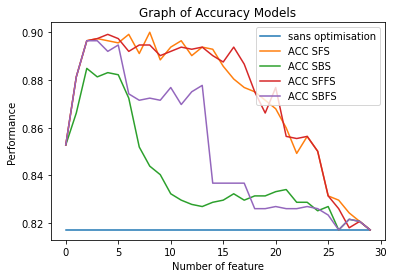

In [ ]:
plt.figure() # Création d'une figure
plt.plot(range(0,len(ACC_sansOpt_col)), ACC_sansOpt_col, label='sans optimisation')
plt.plot(range(0,len(ACC_SFS_col)), ACC_SFS_col, label='ACC SFS')
plt.plot(range(0,len(ACC_SBS_col)), ACC_SBS_col, label='ACC SBS')
plt.plot(range(0,len(ACC_SFFS_col)), ACC_SFFS_col, label='ACC SFFS')
plt.plot(range(0,len(ACC_SBFS_col)), ACC_SBFS_col, label='ACC SBFS')
# Extra information
plt.title('Graph of Accuracy Models') # titre
plt.xlabel('Number of feature') # axes
plt.ylabel('Performance') # axes
plt.legend() # legend

plt.savefig('figure.png') # sauvegarde la figure dans le repertoire de travail
plt.show() # affiche la figure

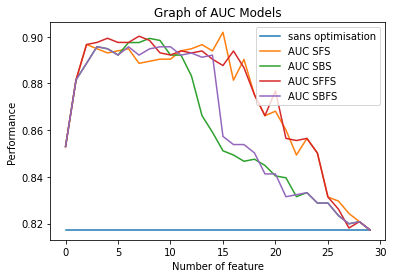

In [ ]:
plt.figure() # Création d'une figure
plt.plot(range(0,len(AUC_sansOpt_col)), AUC_sansOpt_col, label='sans optimisation')
plt.plot(range(0,len(AUC_SFS_col)), AUC_SFS_col, label='AUC SFS')
plt.plot(range(0,len(AUC_SBS_col)), AUC_SBS_col, label='AUC SBS')
plt.plot(range(0,len(AUC_SFFS_col)), AUC_SFFS_col, label='AUC SFFS')
plt.plot(range(0,len(AUC_SBFS_col)), AUC_SBFS_col, label='AUC SBFS')
# Extra information
plt.title('Graph of AUC Models') # titre
plt.xlabel('Number of feature') # axes
plt.ylabel('Performance') # axes
plt.legend() # legend

plt.savefig('figure.png') # sauvegarde la figure dans le repertoire de travail
plt.show() # affiche la figure